In [1]:
%matplotlib inline

from simulation.community import Community, VoteConstraints
from simulation.student import Student
from simulation.artifact import Quality
from reputation.algorithm import allAlgorithms
from output.chart import chart
from output.metrics import printMetrics, printStdDevMetrics

# Collusion Test


The implemented simulator is also able to recreate classic attack scenarios, such as
the collusion attack, which is attackers following a mutual malicious strategy in
order to trick the system. A typical case is that these malicious agents vote other
peers negatively without contributing themselves, so that they gain a better reputation
score relative to their peers. In the classroom, it is possible that there might
be students trying to challenge the system for fun. These attackers should still be
ranked lower than normal contributors.

In [2]:
testName = "Collusion"
community = Community()

### Actions

Action Prototypes


In [3]:
postGoodArtefact = community.createPostAction(Quality.GOOD)
postBadArtefact = community.createPostAction(Quality.BAD)
voteBadNegative = community.createVoteAction(Quality.BAD, VoteConstraints.BADART)
voteAnyNegative = community.createVoteAction(Quality.BAD, VoteConstraints.NONE)
voteGoodPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.GOODART)
voteAnyPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.NONE)

### Student Archetypes

One group of competent users.

In [4]:
normal = Student("normal",
        [
            (0.24, postGoodArtefact),
            (0.06, postBadArtefact),
            (0.28, voteBadNegative),
            (0.07, voteAnyNegative),
            (0.28, voteGoodPositive),
            (0.07, voteAnyPositive),
        ])
community.addStudents(normal, 10)

Another group of chaotic, malicious users.

In [5]:
mal = Student("mal",
        [
            (1, voteAnyNegative)
        ])
community.addStudents(mal, 10)

## Synthesis

Reputation scores are based on 100 actions by the 20 students for 100 iterations. The charts and metrics are shown below.

Progress: [##################################################] 100.0%
######## Mean & Std. Dev.: InDegree ########
Distinction: 7.19158187714 ± 1.68683202932
Correctness: 0.0 ± 0.0
Inversion Quality: 0.0 ± 0.0

######## Mean & Std. Dev.: InDegreePositive ########
Distinction: 7.9377844136 ± 2.03832312815
Correctness: 1.0 ± 0.0
Inversion Quality: 1.0 ± 0.0

######## Mean & Std. Dev.: EigenTrust ########
Distinction: 0.523349869111 ± 0.899861253047
Correctness: 0.933 ± 0.0664153596693
Inversion Quality: 0.9653 ± 0.0448654655609

######## Mean & Std. Dev.: PageRank ########
Distinction: 8.16179227073 ± 2.03568223269
Correctness: 1.0 ± 0.0
Inversion Quality: 1.0 ± 0.0


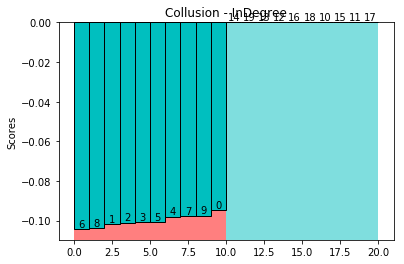

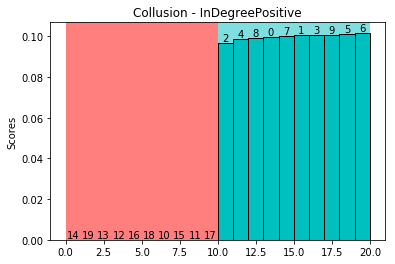

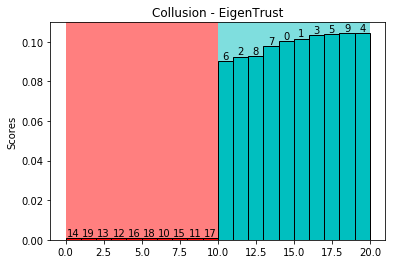

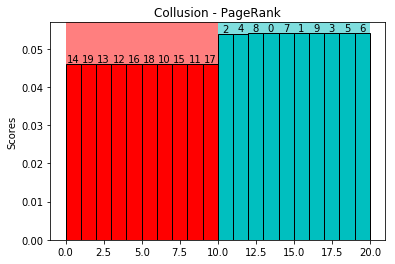

In [6]:
groups = ('mal', 'normal')
colors = {'mal': 'r', 'normal': 'c'}
results = community.run([InDegree(), InDegreePositive(), EigenTrust(), PageRank()], 100, 100)
for (name, result, intermediateResults) in results:
    c = chart(result, groups, colors, testName + " - " + name)
    # printMetrics(name, result, groups)
    printStdDevMetrics(name, intermediateResults, groups)